### 컴퓨터 비전(Computer Vision) 이란?
- 컴퓨터를 이용하여 정지영상 또는 동영상으로 부터 의미 있는 정보를 추출하는 방법을 연구하는 학문
- 즉, 사람이 눈으로 사물을 보고 인지하는 작업을 컴퓨터가 수행

### 영상(image)이란?
- 픽셀(pixel)이 바둑판 모양의 격자에 나열되어 있는 형태(2차원 행렬)
- 픽셀 : 영상의 기본 단위, picture element, 화소 

### installation
- pip install opencv-python
- pip install opencv-contrib-python

In [2]:
# Library
import cv2
import matplotlib.pyplot as plt

In [7]:
# image 불러오기
img = cv2.imread("/kaggle/input/data-cat/cat.png", cv2.IMREAD_COLOR)

cv2.IMREAD_COLOR(기본값)    
cv2.IMREAD_GRAYSCALE    
cv2.IMREAD_UNCHANGED

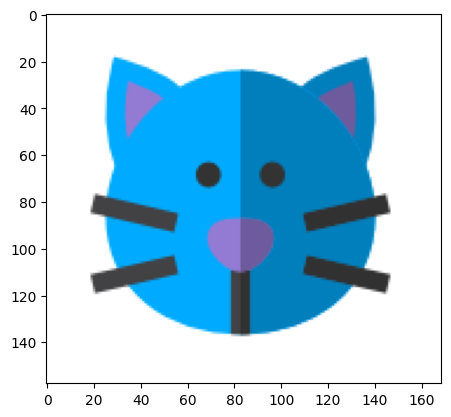

In [8]:
# 출력하기
# cv2.imshow('Image', img) : python code(.py)만 가능 
plt.imshow(img)
plt.show()

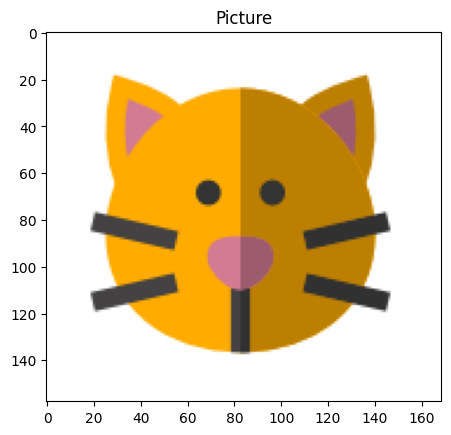

In [10]:
### opencv는 색상 순서가 BGR 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Picture')
plt.show()

---
### 이미지 속상 가져오기
cv2.imread()함수로 어떤 이미지를 불러오면 내부속성은 numpy로 표현되며 불러온 이미지의 속성은 다음과 같습니다.   
1. ndim : 차원의 수     
- 그레이스케일 영상 : 2
- 컬러 영상 : 3

2. shape : 각 차원의 크기    
- 그레이스케일 영상 : (h, w)
- 컬러 영상 : (h, w, 3)

3. size : 전체 요소 갯수 (전체 픽셀의 갯수)    
- 그레이스케일 영상 : h * w
- 컬러 영상 : h * w* 3

4. dtype: 요소 타입, 영상 데이터는 uint8

### 컬러와 흑백

In [11]:
catBW = cv2.imread("/kaggle/input/data-cat/cat.png", cv2.IMREAD_GRAYSCALE)
catColor = cv2.imread("/kaggle/input/data-cat/cat.png", cv2.IMREAD_COLOR)

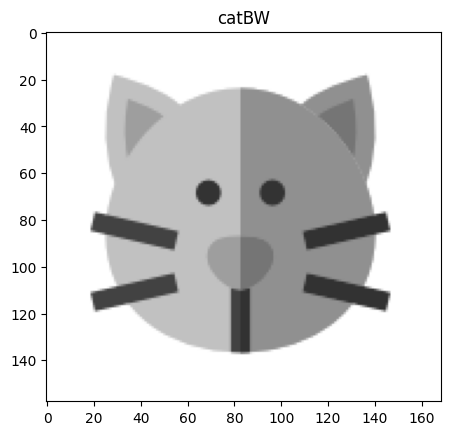

In [12]:
# 흑백 이미지 보기
plt.imshow(cv2.cvtColor(catBW, cv2.COLOR_BGR2RGB))
plt.title('catBW')
plt.show()

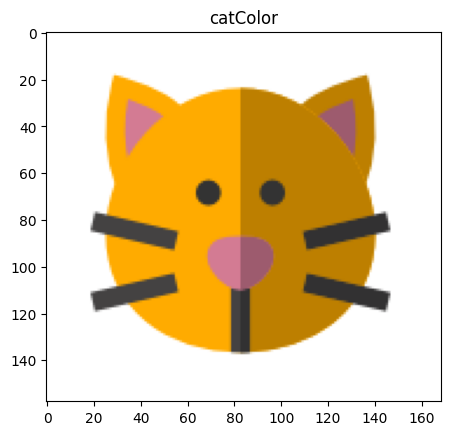

In [13]:
# 컬러 이미지 보기
plt.imshow(cv2.cvtColor(catColor, cv2.COLOR_BGR2RGB))
plt.title('catColor')
plt.show()

In [17]:
# 흑백 이미지 속성 보기
print('shape :', catBW.shape)
print('size :', catBW.size)
print('ndim :', catBW.ndim)
print('dtype :', catBW.dtype)

shape : (158, 169)
size : 26702
ndim : 2
dtype : uint8


In [18]:
# 컬러 이미지 속성 보기
print('shape :', catColor.shape)
print('size :', catColor.size)
print('ndim :', catColor.ndim)
print('dtype :', catColor.dtype)

shape : (158, 169, 3)
size : 80106
ndim : 3
dtype : uint8


### 원하는 사이즈의 이미지 생성하기

In [19]:
# opencv는 numpy의 ndarray로 이미지를 표현
import numpy as np

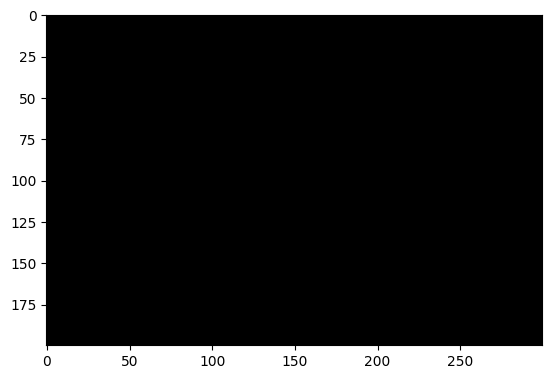

In [20]:
# color image 생성
img1 = np.zeros((200, 300, 3), dtype=np.uint8)

# Image 보기
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

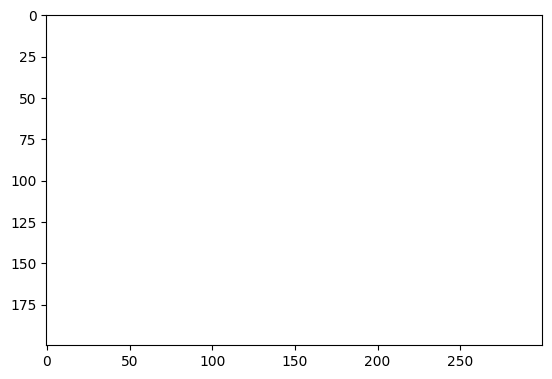

In [23]:
# 흑백 image의 white 컬러 생성
img2 = np.ones((200, 300), dtype=np.uint8) * 255

# Image 보기
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

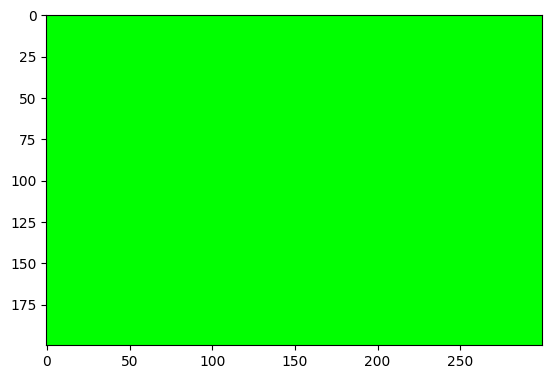

In [24]:
# color image의 녹색 컬러 생성 
img1 = np.full((200, 300, 3),(0,255,0), dtype=np.uint8)

# Image 보기
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

---
### 이미지 밝기 조절
: 덧셈

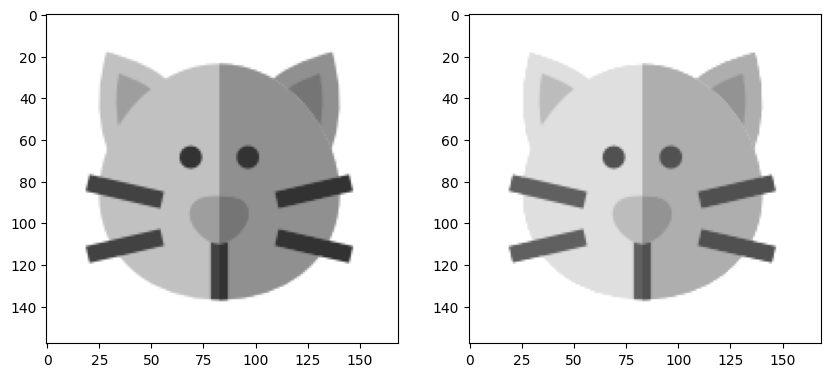

In [25]:
# 흑백 이미지의 밝기 올리기
src = cv2.imread("/kaggle/input/data-cat/cat.png", cv2.IMREAD_GRAYSCALE)
dst = cv2.add(src, 30)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

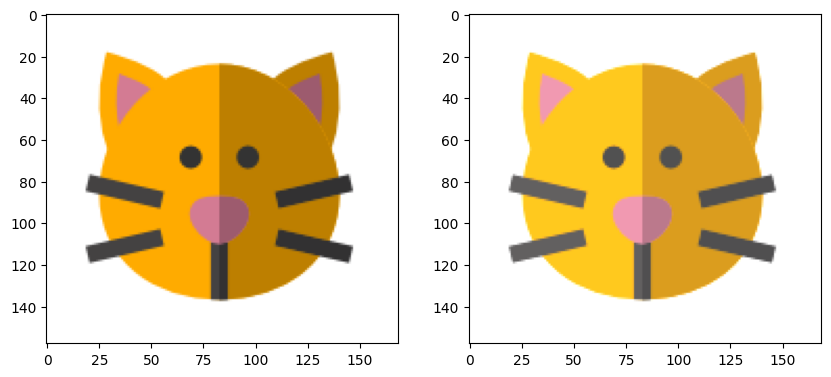

In [28]:
# 컬러 이미지의 밝기 올리기
src = cv2.imread("/kaggle/input/data-cat/cat.png", cv2.IMREAD_COLOR)
dst = cv2.add(src, (30,30,30,0)) # BGRA 

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 2개의 이미지

In [29]:
# 첫번째 이미지 크기 확인
src.shape

(158, 169, 3)

In [30]:
# 두번째 이미지 만들기
from PIL import Image, ImageDraw

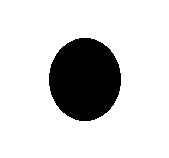

In [32]:
# 흰색 배경
image = Image.new('RGB', (169, 158), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Circle
draw.ellipse(((169-120),(158-120), 120, 120), fill=(0,0,0))
image.save("./circle.png")
image

In [33]:
# 이미지 크기
image.size

(169, 158)

### 두개의 이미지 더하기 (흑백)

In [35]:
src1 = cv2.imread("/kaggle/input/data-cat/cat.png", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("./circle.png", cv2.IMREAD_GRAYSCALE)

print(src1.shape)
print(src2.shape)

(158, 169)
(158, 169)


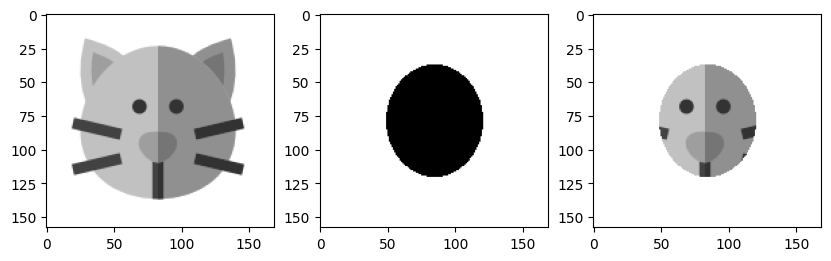

In [36]:
dst = cv2.add(src1, src2)
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(src1, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(src2, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 두개의 이미지 더하기 (컬러)

In [37]:
src1 = cv2.imread("/kaggle/input/data-cat/cat.png", cv2.IMREAD_COLOR)
src2 = cv2.imread("./circle.png", cv2.IMREAD_COLOR)

print(src1.shape)
print(src2.shape)

(158, 169, 3)
(158, 169, 3)


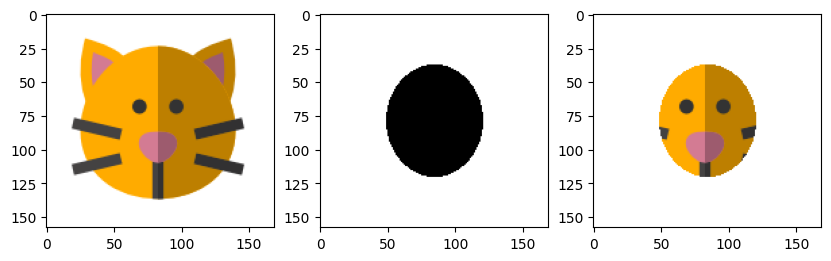

In [38]:
dst = cv2.add(src1, src2)
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(src1, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(src2, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 뺄셈

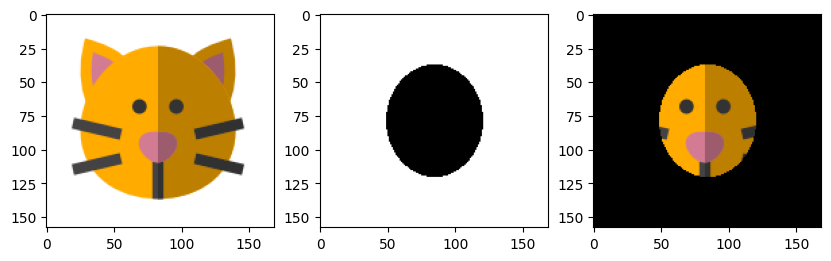

In [39]:
dst = cv2.subtract(src1, src2)
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(src1, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(src2, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 차이

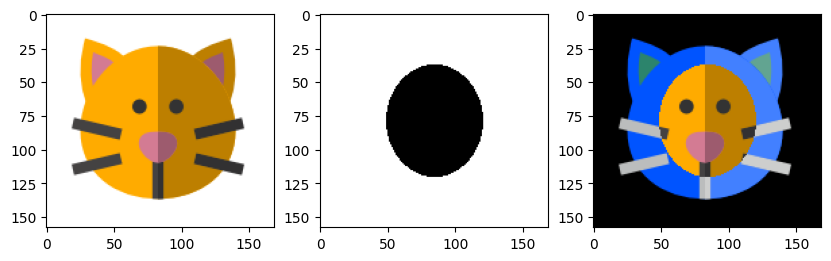

In [40]:
dst = cv2.absdiff(src1, src2)
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(src1, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(src2, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### CCTV영상 차이점 비교

In [41]:
src1 = cv2.imread("/kaggle/input/data-cctv/cctv01.png", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("/kaggle/input/data-cctv/cctv02.png", cv2.IMREAD_GRAYSCALE)

print(src1.shape)
print(src2.shape)

(229, 259)
(229, 259)


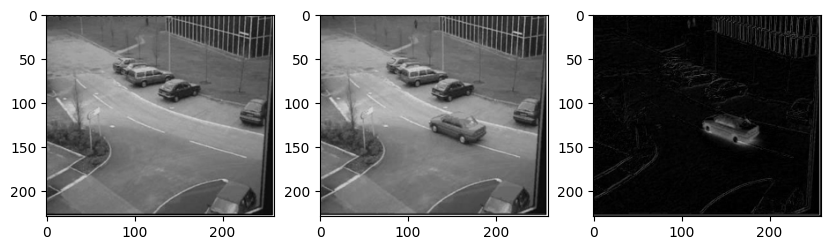

In [42]:
dst = cv2.absdiff(src1, src2)
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(src1, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(src2, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()